## Assignment2: Iris Flower Classification with Decision Tree

Objective:

The objective of this assignment is to implement a decision tree classifier and apply it to the
Iris Flower dataset.

Dataset:

Iris Flower Dataset

Module: CS401 Machine Learning

Student Name: Precious Deremo

Student Number: 20325666

## Data Exploration and Preparation (15 points):

In [1]:
%matplotlib inline

import pandas as pd
import seaborn as sns
import matplotlib as m
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import sys

1.1 Load the Iris dataset and examine its structure

Using the inbuilt methods to import and load the iris dataset. Taking a look at the structure of the dataset to view what variables and target we have to work with. The descr column prints out a nice summary of each characteristic of the iris dataset column names and what they are used for. The keys function shows the names of the columns that are used in this iris dataset. The target is a datatype of int32 as we can see from the code.

In [2]:
from sklearn import datasets
iris = datasets.load_iris()


In [3]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [4]:
print(iris["DESCR"])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

This showcases the actual data stored in the iris data array.

In [5]:
iris["data"]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

These are the feature names of the iris dataset

In [6]:
iris["feature_names"]

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

This is the target of values we expect to hit once we train the model

In [7]:
iris["target"]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [8]:
print(type(iris["target"].dtype))

<class 'numpy.dtype[int32]'>


These are the names associated with the target. So as we will see later on:

0 -> corresponds with Setosa

1 -> corresponds with Versicolor

2 -> corresponds with Virginica 


In [9]:
iris["target_names"]

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

1.2 Explore the dataset by calculating summary statistics and visualizing the data
using appropriate plots (e.g., histograms, scatter plots).

I changed the numpy.array to a pandas.Dataframe as according to the tutorial and from Assignment 1, dataframes are more flexible to work with when it comes to annalysing and summarising the data in human readable format.

In [10]:
iris_dataframe = pd.DataFrame(iris["data"], columns= iris["feature_names"])
iris_dataframe

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


I included the target value into the dataframe i created, also following from the tutorial, as it would show which values mapped to the target value.

In [11]:
iris_dataframe["target"] = iris["target"]
iris_dataframe.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


This table represents the summary statistics of the iris dataframe. As we observe the max and min values are as follows:

Sepal length min: 4.3
Sepal length max: 7.9

Sepal width min: 2
Sepal width max: 4.4

Petal length min: 1
Petal length max: 6.9

Petal width min: 0.1
Petal width max: 2.5

These values are going to be key for our decision tree classifier model in which it will use these set values to predict the type of iris flower. As we will see later, some of these feature values overlap with one another and we will see the correlation between them. For now the most important observation is that we now know the max and min values for these features.

In [12]:
iris_dataframe.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


The  size of the iris data frame I have created in which 150 rows x 5 columns

In [13]:
iris_dataframe.size

750

There are no invalid values in the dataset

In [14]:
iris_dataframe.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

## Distribution of features using Histograms

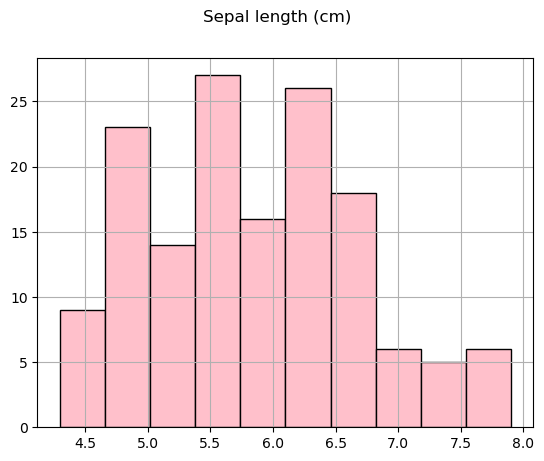

In [15]:
iris_dataframe["sepal length (cm)"].hist(color = "pink", edgecolor = "black")
plt.suptitle("Sepal length (cm)")
plt.show()

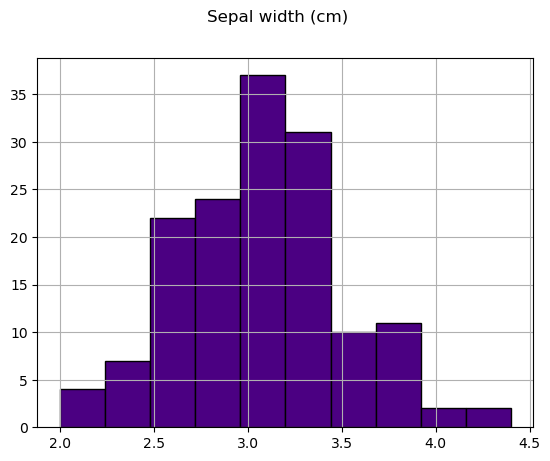

In [16]:
iris_dataframe["sepal width (cm)"].hist(color = "indigo",edgecolor = "black")
plt.suptitle("Sepal width (cm)")
plt.show()

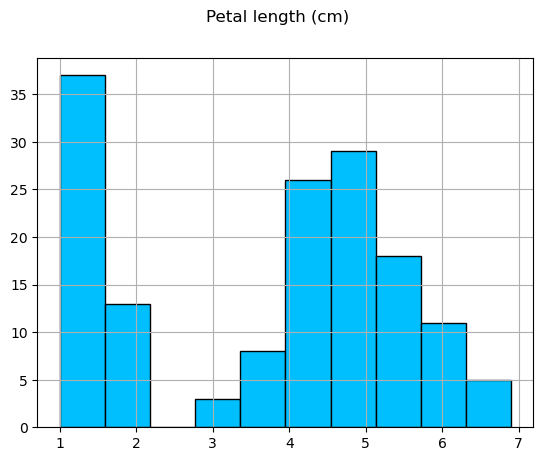

In [17]:
iris_dataframe["petal length (cm)"].hist(color = "deepskyblue",edgecolor = "black")
plt.suptitle("Petal length (cm)")
plt.show()

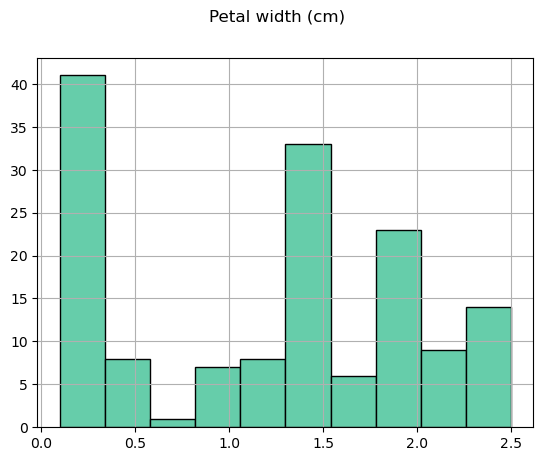

In [18]:
iris_dataframe["petal width (cm)"].hist(color = "mediumaquamarine",edgecolor = "black")
plt.suptitle("Petal width (cm)")
plt.show()

In [19]:
#Mapping the target values to the species names and creating a new column to store the results
iris_dataframe["species_name"] = iris_dataframe["target"].map({0: "setosa", 1: "versicolor", 2:"virginica" })

## Scatterplot of the features

As I mentioned earlier in this report, some of the features overlap with each other so it is hard to make a clear distinction between them. However, later on in these scatter plots we will notice that the iris flower Setosa sort of separates itself from the rest. Almost as if isolating the flower based on its unique features.

c:\Users\pdere\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


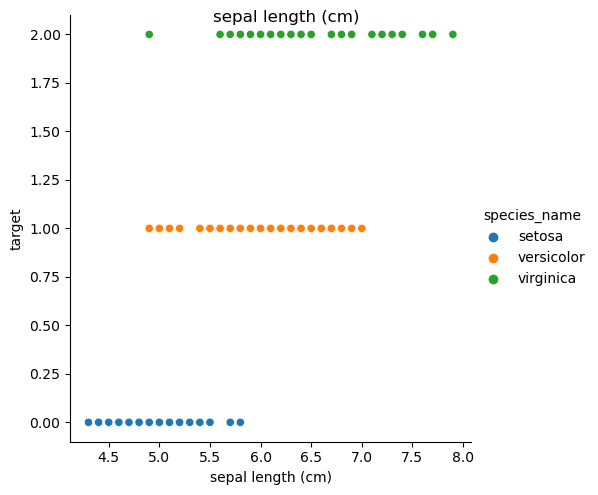

In [20]:
sns.relplot(x = "sepal length (cm)", y = "target", hue = "species_name", data= iris_dataframe)
plt.suptitle("sepal length (cm)")
plt.show()

c:\Users\pdere\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


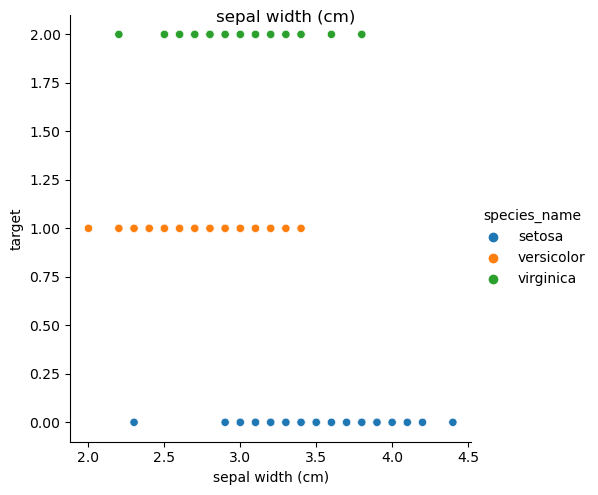

In [21]:
sns.relplot(x = "sepal width (cm)", y = "target", hue = "species_name", data= iris_dataframe)
plt.suptitle("sepal width (cm)")
plt.show()

Note that in petal length and petal width, it is a little easier to see the separation between Setosa from the rest of the species. Versicolor and Virginica still overlap quite a bit it seems. 

c:\Users\pdere\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


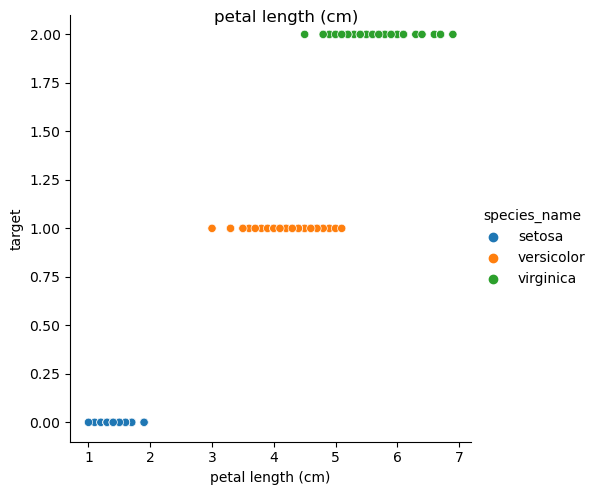

In [22]:
sns.relplot(x = "petal length (cm)", y = "target", hue = "species_name", data= iris_dataframe)
plt.suptitle("petal length (cm)")
plt.show()

c:\Users\pdere\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


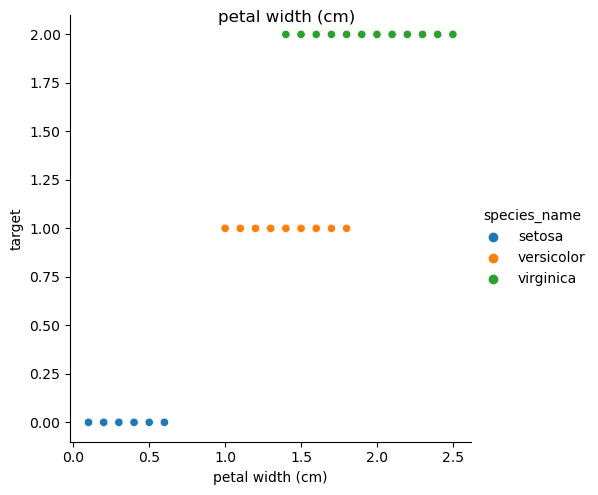

In [23]:
sns.relplot(x = "petal width (cm)", y = "target", hue = "species_name", data= iris_dataframe)
plt.suptitle("petal width (cm)")
plt.show()

## Pairplots to visualise the distribution of the iris datframe all at once

c:\Users\pdere\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


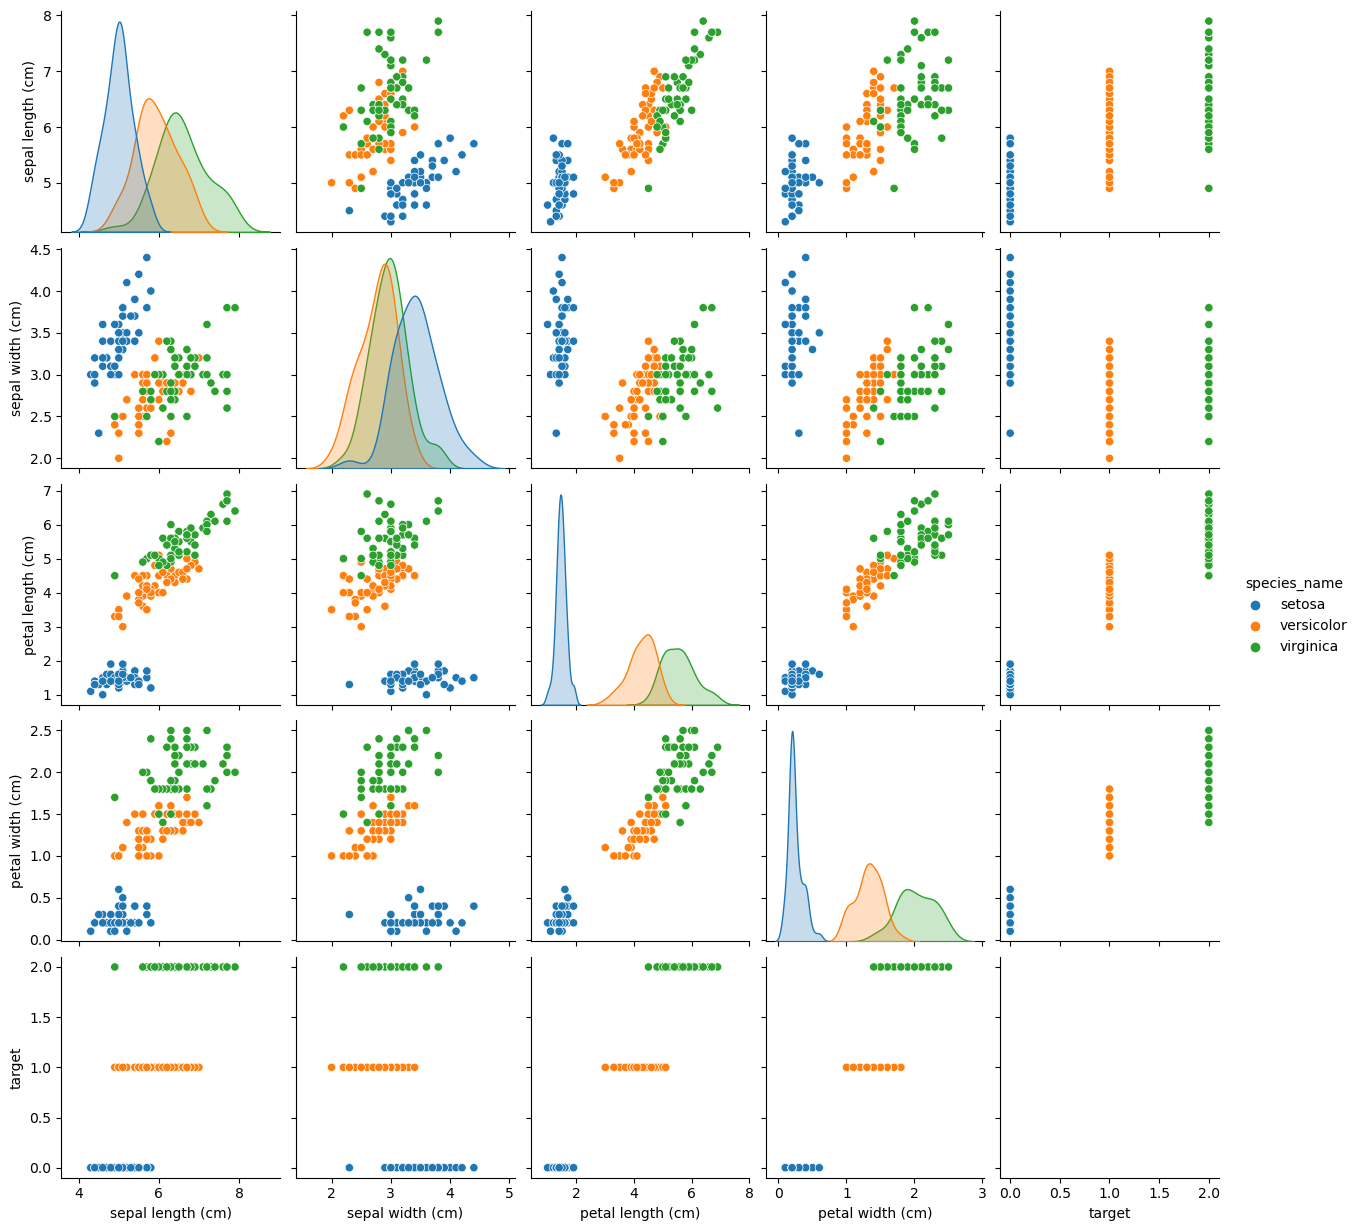

In [24]:
sns.pairplot(iris_dataframe, hue="species_name")

## Correlation Matrix

In this correlation matrix, we can see which values depend on the other and which variables may be independent of the other. For example, it seems that petal length relies on petal width, in which as 1 increases so does the other. Sepal width  is almost independent of sepal length. Therefore, sepal width does not rely on sepal length to determine its value. So it seems the most important values or I should say Feature names to determine the iris species type according to the correlation matrix is Petal length and petal width respectively.

<Axes: >

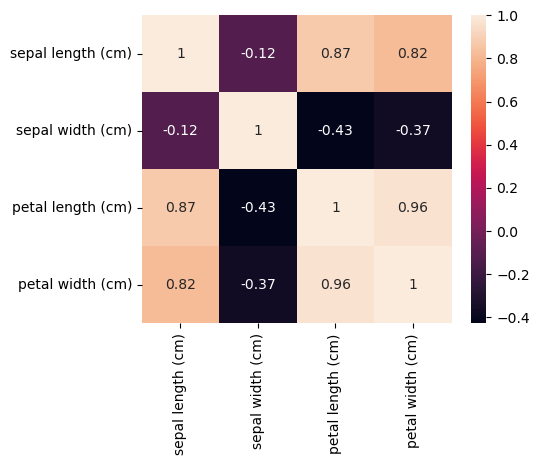

In [25]:
#iris_dataframe.corr
iris_set = pd.DataFrame(iris["data"], columns= iris["feature_names"])
fig, ax = plt.subplots(figsize =(5,4))
sns.heatmap(iris_set.corr(), annot=True, ax=ax)

## Modeling Preparation using the training data

1.3 Split the dataset into training (80%) and testing sets (20%).

In [26]:
from sklearn.model_selection import train_test_split

x holds the features array which include sepal length, sepal width etc. y holds all the target values that we will use the x data to predict. We create a training data of 80% and a testing data of 20%. The training data consists of the features and the target values that the model will learn from and user the pattern to predict the testing data.

In [27]:
#split dataset in features and target variable
feature_cols = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
X = iris_dataframe[feature_cols] # Features
y = iris_dataframe.target # Target variable
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) # 80% training and 20% test

## 2. Decision Tree Implementation (30 points):

2.1 Implement a decision tree classifier using scikit-learn's DecisionTreeClassifier
class.

2.2 Train the decision tree classifier on the training data

2.3 Set and tune hyperparameters like the maximum depth of the tree, minimum
samples per leaf, or other relevant parameters.

I had implemented and trained the Decision Tree Classifier model in the same  code block. I hope this is ok. To run through a bit of the code. clf stores our decision tree classifier, I was playing round with the classifier object values such as random state, min sample leafs etc.  y_pred holds the prediction value for the target values that my classifier object has from looking at the testing data .

In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score


# 2.1 + 2.3 Create Decision Tree classifer object -> in which i set and tuned the hyperparameters
clf = DecisionTreeClassifier(criterion='entropy', min_samples_leaf= 1,max_depth= 4, random_state=42)

# 2.2 Train Decision Tree Classifer -> trained it on the training data i created
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset -> predicting the response for the test set
y_pred = clf.predict(X_test)

## 3. Model Evaluation (20 points):

3.1 Use the trained classifier to predict the species of iris flowers in the testing
dataset.

In [29]:
y_pred

array([0, 1, 1, 2, 2, 2, 0, 1, 2, 0, 2, 0, 1, 0, 1, 2, 0, 0, 0, 0, 1, 2,
       1, 1, 1, 1, 0, 2, 0, 0])

In [30]:
y_test

38     0
67     1
96     1
109    2
70     1
136    2
7      0
71     1
102    2
29     0
128    2
23     0
61     1
32     0
73     1
118    2
6      0
14     0
10     0
35     0
52     1
57     1
91     1
58     1
53     1
56     1
39     0
140    2
19     0
30     0
Name: target, dtype: int32

3.2 Evaluate the model's performance using appropriate classification metrics
such as accuracy, precision, recall, F1-score, etc.

In [31]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy score of the model is:",metrics.accuracy_score(y_test, y_pred))

Accuracy score of the model is: 0.9333333333333333


## Cross-validation

In [32]:
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict

print("Accuracy score for the cross validation of the training model is: ",cross_val_score(clf, X_train, y_train, cv= 5, scoring="accuracy"))

Accuracy score for the cross validation of the training model is:  [0.95833333 1.         0.91666667 0.91666667 0.95833333]


In [33]:
print("The mean average of the cross validation score is",np.mean(cross_val_score(clf, X_train, y_train, scoring="accuracy")))

The mean average of the cross validation score is 0.95


Cross Validation Prediction array

In [34]:
target_pred = cross_val_predict(clf, X_train, y_train,cv=5)
target_pred

array([1, 1, 1, 2, 2, 2, 0, 0, 2, 2, 2, 0, 1, 1, 0, 0, 2, 2, 1, 2, 1, 1,
       1, 1, 2, 0, 0, 1, 1, 0, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 2, 2, 0, 2, 2, 0, 0, 0, 0, 1, 2, 2, 2,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 2, 2, 2, 1, 0, 2, 2, 2, 1, 1, 1, 2,
       2, 2, 2, 2, 0, 0, 1, 2, 0, 0, 1, 2, 0, 1, 0, 0, 0, 2, 2, 2, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 2, 2])

Target values that were predicted correctly

In [35]:
pred_correctly = target_pred == y_train

X_train[pred_correctly]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
81,5.5,2.4,3.7,1.0
63,6.1,2.9,4.7,1.4
130,7.4,2.8,6.1,1.9
112,6.8,3.0,5.5,2.1
110,6.5,3.2,5.1,2.0
...,...,...,...,...
75,6.6,3.0,4.4,1.4
9,4.9,3.1,1.5,0.1
64,5.6,2.9,3.6,1.3
124,6.7,3.3,5.7,2.1


Target values that were predicted incorrectly

In [36]:
X_train[-pred_correctly]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
133,6.3,2.8,5.1,1.5
129,7.2,3.0,5.8,1.6
106,4.9,2.5,4.5,1.7
77,6.7,3.0,5.0,1.7
83,6.0,2.7,5.1,1.6
119,6.0,2.2,5.0,1.5


## Precision

What I am predicting

In [37]:
y_pred

array([0, 1, 1, 2, 2, 2, 0, 1, 2, 0, 2, 0, 1, 0, 1, 2, 0, 0, 0, 0, 1, 2,
       1, 1, 1, 1, 0, 2, 0, 0])

The true values also where they are in the table (indiced on the left hand side)

In [38]:
y_test

38     0
67     1
96     1
109    2
70     1
136    2
7      0
71     1
102    2
29     0
128    2
23     0
61     1
32     0
73     1
118    2
6      0
14     0
10     0
35     0
52     1
57     1
91     1
58     1
53     1
56     1
39     0
140    2
19     0
30     0
Name: target, dtype: int32

In [39]:
precision_score(y_test, y_pred, average=None)

array([1.  , 1.  , 0.75])

## Recall

In [40]:
recall_score(y_test, y_pred, average='macro')

0.9444444444444445

## F1 Score

In [41]:
from sklearn.metrics import f1_score
f1_score(y_test,y_pred, average=None)

array([1.        , 0.90909091, 0.85714286])

## Model Training Data Score

In [42]:
Xt, Xv, yt, yv = train_test_split(X_train, y_train, test_size= 0.20)


In [43]:
clf.score(X_train, y_train)

0.9916666666666667

In [44]:
clf.score(Xv, yv)

1.0

Each of these values represent how much of which of the training data had valid inputs of the target individually. The sum of these values represents the model score above.

In [45]:
yv.value_counts()/len(yv)

target
2    0.416667
0    0.375000
1    0.208333
Name: count, dtype: float64

Each of these values represents how much of the training data had valid inputs for the features.

In [46]:
Xv.value_counts()/len(Xv)

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
4.4                3.2               1.3                0.2                 0.041667
4.7                3.2               1.3                0.2                 0.041667
7.3                2.9               6.3                1.8                 0.041667
6.9                3.2               5.7                2.3                 0.041667
                   3.1               5.4                2.1                 0.041667
6.5                3.0               5.8                2.2                 0.041667
                                     5.5                1.8                 0.041667
6.4                3.1               5.5                1.8                 0.041667
                   2.9               4.3                1.3                 0.041667
6.3                3.3               6.0                2.5                 0.041667
                   2.3               4.4                1.3                 0

## 4. Visualization (15 points):

4.1 Visualize the decision tree structure that you've built, showing how it makes
decisions based on the features.

[Text(0.5, 0.9, 'petal length (cm) <= 2.45\nentropy = 1.581\nsamples = 120\nvalue = [38, 38, 44]'),
 Text(0.375, 0.7, 'entropy = 0.0\nsamples = 38\nvalue = [38, 0, 0]'),
 Text(0.625, 0.7, 'petal width (cm) <= 1.75\nentropy = 0.996\nsamples = 82\nvalue = [0, 38, 44]'),
 Text(0.5, 0.5, 'petal length (cm) <= 4.95\nentropy = 0.519\nsamples = 43\nvalue = [0, 38, 5]'),
 Text(0.25, 0.3, 'sepal length (cm) <= 4.95\nentropy = 0.179\nsamples = 37\nvalue = [0, 36, 1]'),
 Text(0.125, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.375, 0.1, 'entropy = 0.0\nsamples = 36\nvalue = [0, 36, 0]'),
 Text(0.75, 0.3, 'petal width (cm) <= 1.55\nentropy = 0.918\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.625, 0.1, 'entropy = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.875, 0.1, 'entropy = 0.918\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(0.75, 0.5, 'entropy = 0.0\nsamples = 39\nvalue = [0, 0, 39]')]

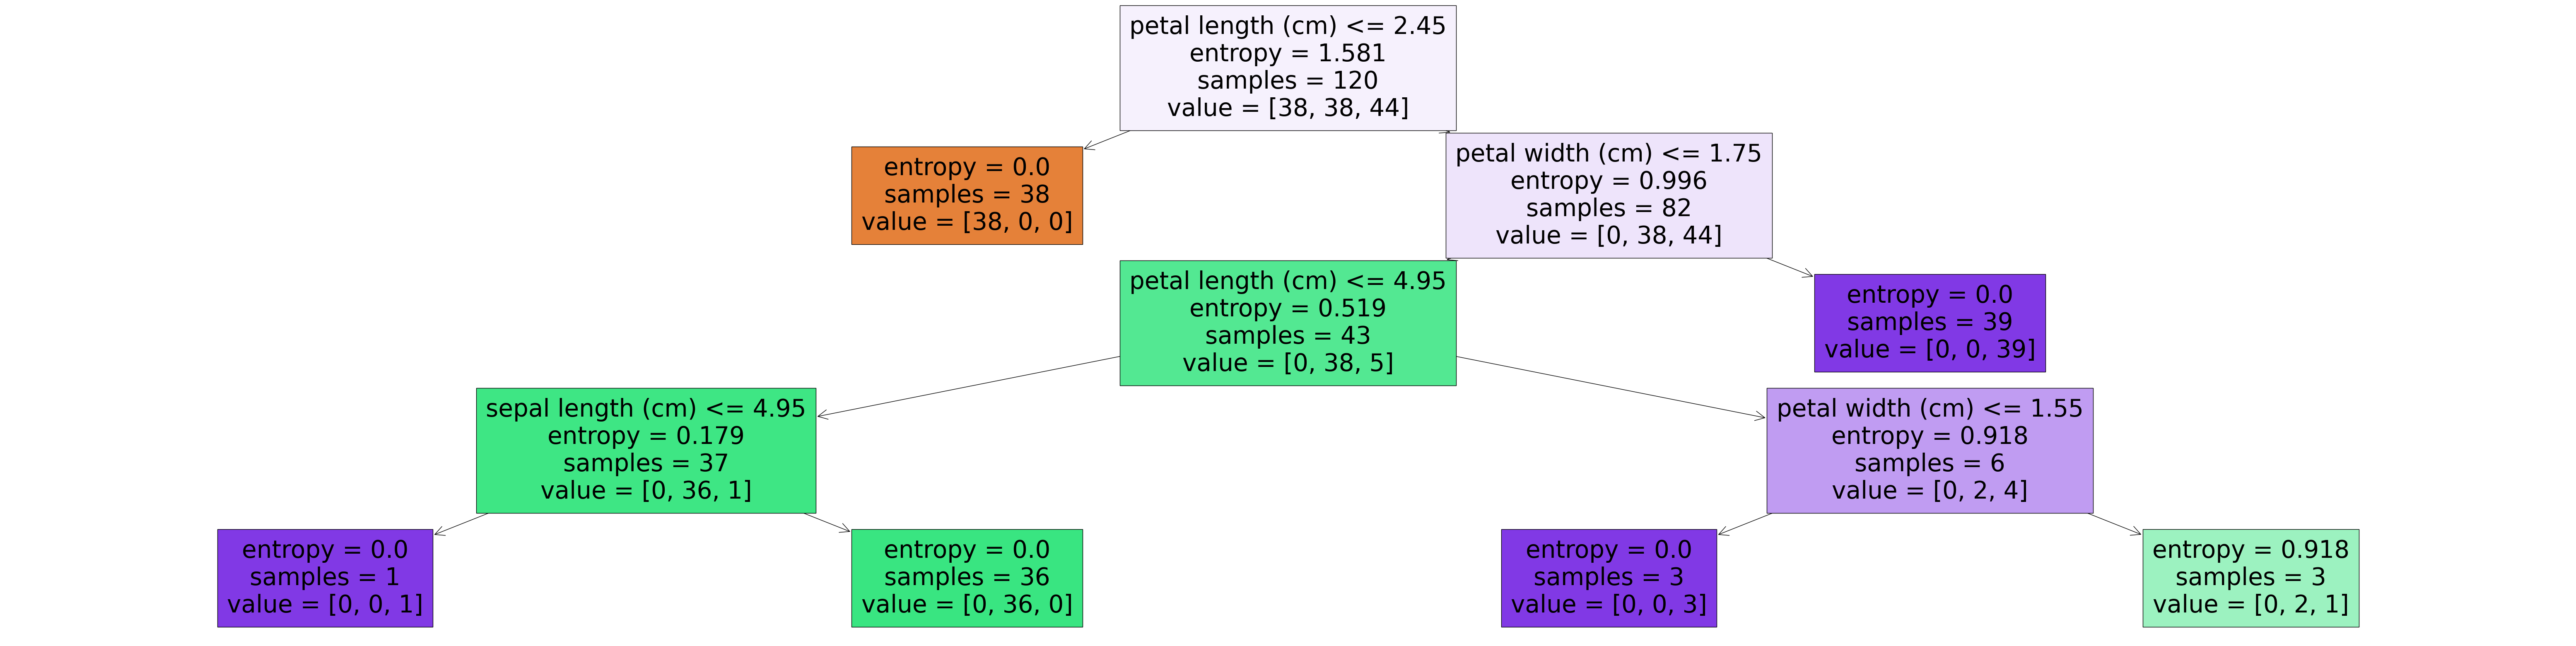

In [47]:
from sklearn.tree import plot_tree, export_text
plt.figure(figsize =(80,20))

plot_tree(clf, feature_names=feature_cols, max_depth=4, filled=True)

In [48]:
clf.tree_.max_depth

4

## Discussion and Conclusion (20 points):

Here I have chosen to import the iris dataset from the kaggle website. I have listed this reference below. I wanted to try group the target or I should say species names to view how I would tackle the decision tree classification problem. I wanted to make it human readable for myself and view interesting details about the data this way. I have grouped the individual species with their max and min values.

My decision tree chose to split the data based on the petal length at first. Which means that the classifier model decided that petal length tas the most important feature to determine the start at which we could identify the iris flower species. I have taken the list of pros and cons for a Decision Tree classifier down below as I found them on a tutorial which I thought would be handy to include. I believe this was a very interesting problem to tackle as there were no missing values that needed handling.


Further observations I have made while doing the analysis and classformation:

When splitting the train and test dataset I noticed:

Using random state = 42 gives Accuracy: 1.0

using random state = 0 gives Accuracy: 1.0

using random state = 1 gives Accuracy: 0.9666666666666667

This is if you also include randomstate for the decision tree model. Otherwise 42 gives me an Accuracy of 96%.


It may be the machine I am running the code on perhaps. I hope this does not affect the model's performance too drastically (and also my grades).

In conclusion, I believe more training and testing should be done with more models to compare and contrast the performance and decide which model works best for the dataset.



In [49]:
iris_dataset = pd.read_csv('IRIS.csv')

In [50]:
iris_dataset.groupby('species').get_group('Iris-setosa').aggregate([min,max])

,sepal_length,sepal_width,petal_length,petal_width,species
min,4.3,2.3,1.0,0.1,Iris-setosa
max,5.8,4.4,1.9,0.6,Iris-setosa


In [51]:
iris_dataset.groupby('species').get_group('Iris-versicolor').aggregate([min,max])

,sepal_length,sepal_width,petal_length,petal_width,species
min,4.9,2.0,3.0,1.0,Iris-versicolor
max,7.0,3.4,5.1,1.8,Iris-versicolor


In [52]:
iris_dataset.groupby('species').get_group('Iris-virginica').aggregate([min,max])

,sepal_length,sepal_width,petal_length,petal_width,species
min,4.9,2.2,4.5,1.4,Iris-virginica
max,7.9,3.8,6.9,2.5,Iris-virginica


In [53]:
iris_dataset.groupby("species").get_group("Iris-setosa").describe()

,sepal_length,sepal_width,petal_length,petal_width
count,50.00000,50.000000,50.000000,50.00000
mean,5.00600,3.418000,1.464000,0.24400
std,0.35249,0.381024,0.173511,0.10721
min,4.30000,2.300000,1.000000,0.10000
25%,4.80000,3.125000,1.400000,0.20000
50%,5.00000,3.400000,1.500000,0.20000
75%,5.20000,3.675000,1.575000,0.30000
max,5.80000,4.400000,1.900000,0.60000


In [54]:
iris_dataset.groupby("species").get_group("Iris-versicolor").describe()

,sepal_length,sepal_width,petal_length,petal_width
count,50.000000,50.000000,50.000000,50.000000
mean,5.936000,2.770000,4.260000,1.326000
std,0.516171,0.313798,0.469911,0.197753
min,4.900000,2.000000,3.000000,1.000000
25%,5.600000,2.525000,4.000000,1.200000
50%,5.900000,2.800000,4.350000,1.300000
75%,6.300000,3.000000,4.600000,1.500000
max,7.000000,3.400000,5.100000,1.800000


In [55]:
iris_dataset.groupby("species").get_group("Iris-virginica").describe()

,sepal_length,sepal_width,petal_length,petal_width
count,50.00000,50.000000,50.000000,50.00000
mean,6.58800,2.974000,5.552000,2.02600
std,0.63588,0.322497,0.551895,0.27465
min,4.90000,2.200000,4.500000,1.40000
25%,6.22500,2.800000,5.100000,1.80000
50%,6.50000,3.000000,5.550000,2.00000
75%,6.90000,3.175000,5.875000,2.30000
max,7.90000,3.800000,6.900000,2.50000


## References 

From tutorials to answers to errors I had


https://youtu.be/rdaG53khzv0?si=JAnszA0ORXYrY0Bx

https://github.com/mGalarnyk/Python_Tutorials/blob/master/Sklearn/CART/Visualization/DecisionTreesVisualization.ipynb

https://stackoverflow.com/questions/24147278/how-do-i-create-test-and-train-samples-from-one-dataframe-with-pandas

https://www.datacamp.com/tutorial/decision-tree-classification-python


https://towardsdatascience.com/how-to-tune-a-decision-tree-f03721801680

https://stackoverflow.com/questions/28064634/random-state-pseudo-random-number-in-scikit-learn

accuracy = (true_positives + true_negatives) / all_samples


Overfitting
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#:~:text=The%20F1%20score%20can%20be%20%2F%20(precision%20%2B%20recall)

https://www.v7labs.com/blog/f1-score-guide#:~:text=The%20F1%20score%20can%20be,%2Fmacro%2Fweighted%2Fnone.

https://www.statology.org/f1-score-in-python/

https://www.section.io/engineering-education/hyperparmeter-tuning/

I had imported the dataset from this link to get a feel for the data and ran into issues with what I was trying to test for as I did not have target, however i still keep this in to represent the groupings in a comprehensive manner. I shall include this part as I showcase the groupings of values per species


https://www.kaggle.com/datasets/arshid/iris-flower-dataset/data



Found this online as i wanted to determine the range of values for each of the species type in order to figure out how to align the training data
https://www.google.com/search?q=how+to+group+values+by+a+column+fromn+a+dataframe+in+python&oq=how+to+group+values+by+a+column+fromn+a+dataframe+in+python+&gs_lcrp=EgZjaHJvbWUyDggAEEUYChg5GKABGMME0gEJMjI3NDRqMGo3qAIAsAIA&sourceid=chrome&ie=UTF-8
https://builtin.com/data-science/pandas-groupby

https://www.askpython.com/python/examples/precision-and-recall-in-python

https://stackoverflow.com/questions/62126036/how-i-get-y-true-and-y-pred-values-for-loss-function

Had originally used this for my decision tree but switched to a different set of code as running this was a bit of an eyesore

from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,max_depth=5, feature_names = cols)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('Iris_species.png')
Image(graph.create_png())

Pros and Cons of a Decision Tree Model found from a tutorial I was viewing. I found this really helpful when implementing the above methods. Although, I followed the tutorials correctly, I am not sure whether I am fully correct or not. However, I have gained a small understanding on how decision trees work and their functionality in practice.

## Decision Tree Pros

Decision trees are easy to interpret and visualize.

It can easily capture Non-linear patterns.

It requires fewer data preprocessing from the user, for example, there is no need to normalize columns.

It can be used for feature engineering such as predicting missing values, suitable for variable selection.

The decision tree has no assumptions about distribution because of the non-parametric nature of the algorithm.


## Decision Tree Cons
Sensitive to noisy data. 

It can overfit noisy data.

The small variation(or variance) in data can result in the different decision tree. 

This can be reduced by bagging and boosting algorithms.

Decision trees are biased with imbalance dataset, so it is recommended that balance out the dataset before creating the decision tree.